# Introductory ML Problem

In this notebook we look at the results contained in `cube_model_data.csv`.

## The simulation
We have simulated a cube with a 40 nm side length with a cubic discretisation of 2 nm.
The four energy terms included are:
- Exchange
- Uniaxial Anisotropy (along `z` axis)
- Zeeman (1 degree missaligned from `z` axis)
- Demagnetisation
  
The material parameters were sampled from uniform random distributions:
- Ms (0.1 T to 5 T)
- A ($1\times 10^{-13}\, \text{J}/\text{m}$ to $1\times 10^{-11}\, \text{J}/\text{m}$)
- K ($1\times 10^{4}\, \text{J}/\text{m}^3$ to $1\times 10^{7}\, \text{J}/\text{m}^3$)

For each set of chosen parameters (Ms, K, A) we ran a partial hysteresis curve from +10 T to -10 T and calculated (Mr, Hc, BHmax).
If we had not inverted the magnetisation by -10 T then we discarded the data. We ran 2000 simulations and got 1621 valid data sets.
The processed data is saved in `toy_model_data.csv`.

# The task
Use the intrinsic properties (Ms, K, A) to predict the extrinsic properties (Mr, Hc, BHmax).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
url = f"https://nomad-lab.eu/prod/v1/api/v1/uploads/WoLtaC5LR3akxiQesk9xgg/raw/cube_model_data.csv"
df = pd.read_csv(url)
df.head()

,Ms (A/m),A (J/m),K (J/m^3),Hc (A/m),Mr (A/m),BHmax (J/m^3)
0,1.978357e+06,8.715079e-12,5.165116e+06,2.757326e+06,1.975102e+06,1.222818e+06
1,3.430750e+06,3.855352e-12,7.009515e+06,1.659767e+06,3.401568e+06,3.153160e+06
2,1.361394e+06,2.312799e-12,5.184123e+06,4.492132e+06,1.360846e+06,5.816494e+05
3,9.035347e+05,2.142328e-12,4.102306e+06,5.908612e+06,9.034202e+05,2.563932e+05
4,3.397994e+06,9.025351e-13,5.387797e+06,1.610943e+06,3.345999e+06,2.108044e+06


In [4]:
def plot(color_name):
    fig, ax = plt.subplots(1, 3, figsize=(10, 5))

    color = df[color_name]

    ax[0].scatter(df["Ms (A/m)"], df["K (J/m^3)"], c=color, alpha = 0.6)
    ax[0].set_xlabel(r"$M_s \, (\mathrm{A/m})$")
    ax[0].set_ylabel(r"$K \, (\mathrm{J/m^3})$")

    ax[1].scatter(df["Ms (A/m)"], df["A (J/m)"], c=color, alpha = 0.6)
    ax[1].set_xlabel(r"$M_s \, (\mathrm{A/m})$")
    ax[1].set_ylabel(r"$A \, (\mathrm{J/m})$")

    scatter = ax[2].scatter(df["K (J/m^3)"], df["A (J/m)"], c=color, alpha = 0.6)
    ax[2].set_xlabel(r"$K \, (\mathrm{J/m^3})$")
    ax[2].set_ylabel(r"$A \, (\mathrm{J/m})$")
    fig.colorbar(scatter, ax=ax[2], label=color_name)
    
    plt.tight_layout()
    plt.show()

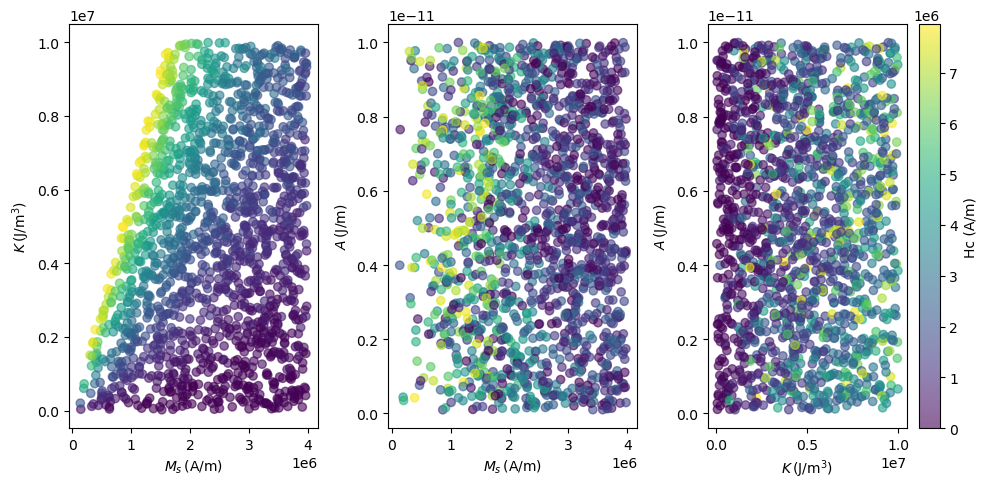

In [5]:
plot("Hc (A/m)")

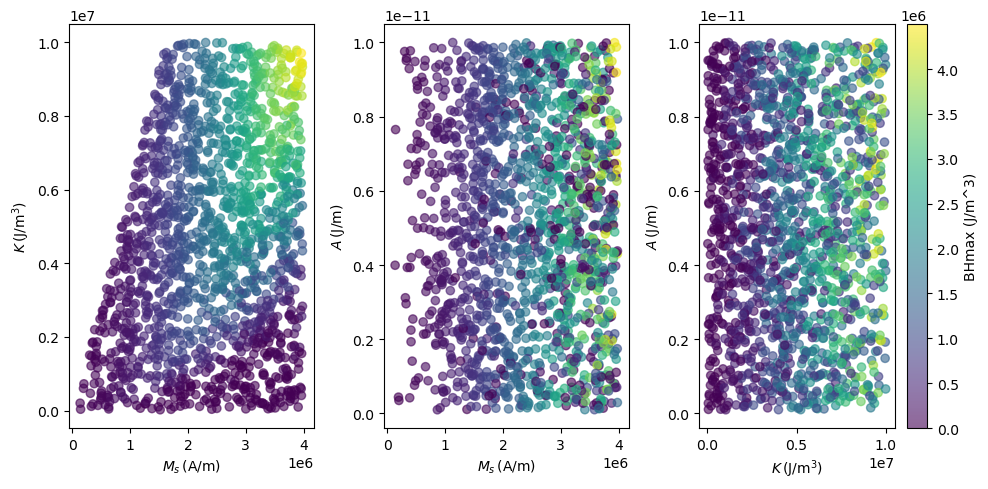

In [6]:
plot("BHmax (J/m^3)")

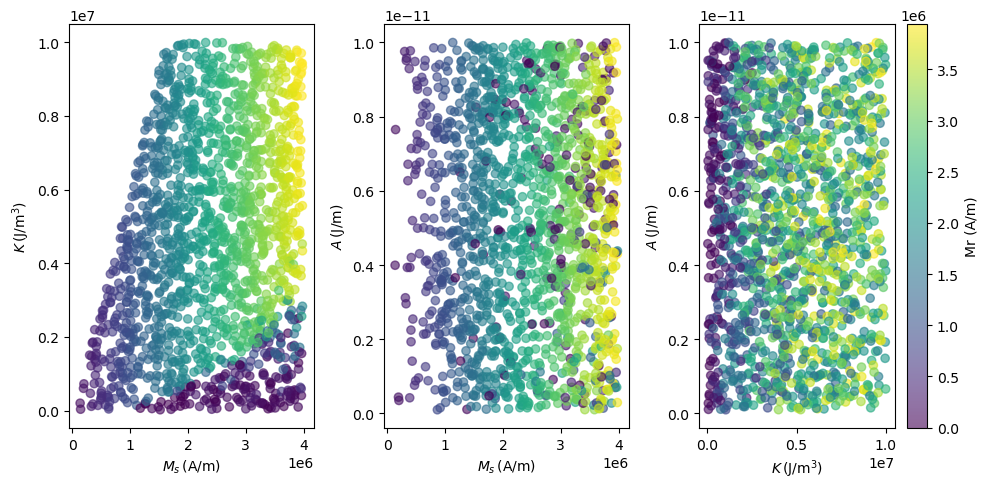

In [7]:
plot("Mr (A/m)")